### 02.2 非线性反向传播

<img src="https://microsoft.github.io/ai-edu/%E5%9F%BA%E7%A1%80%E6%95%99%E7%A8%8B/A2-%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%9F%BA%E6%9C%AC%E5%8E%9F%E7%90%86/%E7%AC%AC1%E6%AD%A5%20-%20%E5%9F%BA%E6%9C%AC%E7%9F%A5%E8%AF%86/img/2/game.png" ch="500" />

设置$x$初始值为$1.3$，目标值为$1.8$，误差小于$0.001$

In [71]:
import numpy as np
import matplotlib.pyplot as plt

x=1.3
y=1.8
error = 1e-3
X,Y = [],[]

前向计算：根据数学解析式，分别计算$a,b,c$的值

In [72]:
def forward(x):
    a = x*x
    b = np.log(a)
    c = np.sqrt(b)
    return a,b,c
a,b,c = forward(x)
print("x=%f,a=%f,b=%f,c=%f" %(x,a,b,c))

x=1.300000,a=1.690000,b=0.524729,c=0.724381


反向传播:根据差值依次向前传播给$x$，从而更新$x$值

$$
\frac{da}{dx}=\frac{d(x^2)}{dx}=2x=\frac{\Delta a}{\Delta x} \tag{1}
$$

$$
\frac{db}{da} =\frac{d(\ln{a})}{da} =\frac{1}{a} = \frac{\Delta b}{\Delta a} \tag{2}
$$

$$
\frac{dc}{db}=\frac{d(\sqrt{b})}{db}=\frac{1}{2\sqrt{b}}=\frac{\Delta c}{\Delta b} \tag{3}
$$

$$
\Delta c = c - y \tag{4}
$$

In [73]:
def backward(x,a,b,c,y):
    #计算c与目标之间的差值
    loss = c - y
    delta_c = loss
    delta_b = delta_c * 2 * np.sqrt(b)
    delta_a = delta_b * a
    delta_x = delta_a / 2 / x
    return loss, delta_x, delta_a, delta_b, delta_c
print("loss=%f, delta_x=%f, delta_a=%f, delta_b=%f, delta_c=%f" % backward(x,a,b,c,y))

loss=-1.075619, delta_x=-1.012906, delta_a=-2.633554, delta_b=-1.558316, delta_c=-1.075619


更新x的值，并控制其不超过定义域 $1<x<=10$

In [74]:
def update(x, delta_x):
    x = x - delta_x
    if x < 1:
        x = 1.1
    return x

开始迭代：

In [75]:
while(True):
        # 前向计算
        print("前向计算...")
        a,b,c = forward(x)
        print("x=%f,a=%f,b=%f,c=%f" %(x,a,b,c))
        X.append(x)
        Y.append(c)
        # 反向传播
        print("反向传播...")
        loss, delta_x, delta_a, delta_b, delta_c = backward(x,a,b,c,y)
        #检测是否小于规定误差
        if abs(loss) < error:
            print("done!")
            break
        # 更新x的值
        x = update(x, delta_x)
        print("delta_c=%f, delta_b=%f, delta_a=%f, delta_x=%f\n" %(delta_c, delta_b, delta_a, delta_x))

前向计算...
x=1.300000,a=1.690000,b=0.524729,c=0.724381
反向传播...
delta_c=-1.075619, delta_b=-1.558316, delta_a=-2.633554, delta_x=-1.012906

前向计算...
x=2.312906,a=5.349532,b=1.677009,c=1.294994
反向传播...
delta_c=-0.505006, delta_b=-1.307960, delta_a=-6.996972, delta_x=-1.512594

前向计算...
x=3.825499,a=14.634444,b=2.683378,c=1.638102
反向传播...
delta_c=-0.161898, delta_b=-0.530411, delta_a=-7.762271, delta_x=-1.014544

前向计算...
x=4.840043,a=23.426014,b=3.153847,c=1.775907
反向传播...
delta_c=-0.024093, delta_b=-0.085572, delta_a=-2.004621, delta_x=-0.207087

前向计算...
x=5.047130,a=25.473520,b=3.237639,c=1.799344
反向传播...
done!


迭代了5次，画出函数曲线(蓝色)，并将每次迭代的点，用X标记在曲线上。绿色的这个线大概是导数曲线

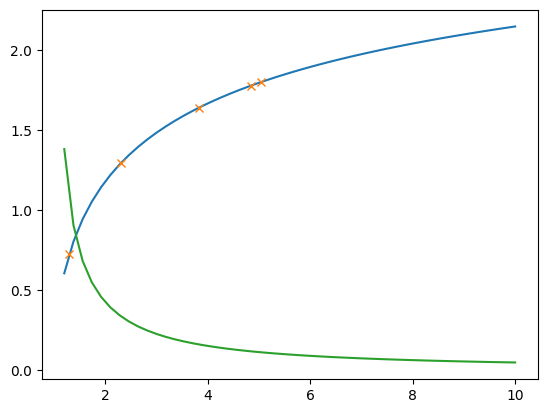

In [76]:
x = np.linspace(1.2,10)
a = x*x
b = np.log(a)
c = np.sqrt(b)
plt.plot(x,c)

plt.plot(X,Y,'x')
d = 1/(x*np.sqrt(np.log(x**2)))
plt.plot(x,d)
plt.show()